In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv('Food-Truck-LineReg.csv',header=None)

In [3]:
data.columns

Int64Index([0, 1], dtype='int64')

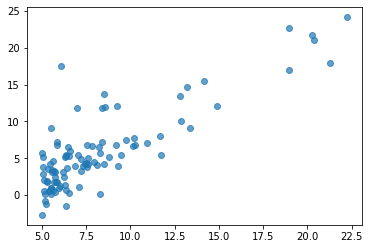

In [4]:
x,y=data[0],data[1]
plt.scatter(x,y,alpha=0.7)

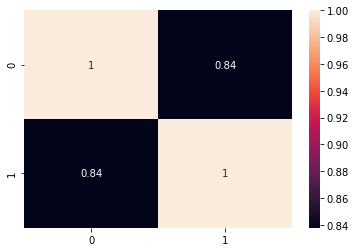

In [5]:
ax = sns.heatmap(data.corr(), annot=True)

In [6]:
data[1].corr(data[0])

0.837873232526341

In [7]:
n=len(data)

In [8]:
data.columns=["x","y"]

In [9]:
data["x"].size

97

In [10]:
xsq=[]
ysq=[]
xy=[]

for i in range (len(data)):
    xsq.append(round(data.x[i]**2,3))
    ysq.append(round(data.y[i]**2,3))
    xy.append(round(data.x[i]*data.y[i],3))

data["x^2"]=xsq
data["y^2"]=ysq
data["xy"]=xy

In [11]:
data

,x,y,x^2,y^2,xy
0,6.1101,17.59200,37.333,309.478,107.489
1,5.5277,9.13020,30.555,83.361,50.469
2,8.5186,13.66200,72.567,186.650,116.381
3,7.0032,11.85400,49.045,140.517,83.016
4,5.8598,6.82330,34.337,46.557,39.983
...,...,...,...,...,...
92,5.8707,7.20290,34.465,51.882,42.286
93,5.3054,1.98690,28.147,3.948,10.541
94,8.2934,0.14454,68.780,0.021,1.199
95,13.3940,9.05510,179.399,81.995,121.284


In [12]:
def avg(ls):
    sum=0
    for it in ls:
        sum=sum+it
    return sum/len(ls)

In [13]:
def sd(xcol):
    temp=0
    for it in xcol:
        temp = temp+(it-avg(xcol))**2

    variance=temp/len(xcol)
    sd=(variance)**(1/2)
    return sd

In [14]:
sdx=sd(data['x'])

In [15]:
sdy=sd(data['y'])

In [16]:
print(sdx)
print(sdy)

3.8498839959227156
5.48178525707763


In [17]:
def summation(summ):
    return avg(summ)*len(data)

In [18]:
xy=summation(data['xy'])

In [19]:
xsquare=summation(data['x^2'])
ysquare=summation(data['y^2'])

In [20]:
#Coefficient of regression 
r=xy/(xsquare*ysquare)

In [21]:
r

0.0001289796980410205

In [22]:
#slope
m= r * sdy /sdx

In [23]:
m

0.00018365202897863733

In [24]:
#y=mx+c
#c=y-mx

c= avg(data['y'])-m*avg(data['x'])

In [25]:
c

5.83763648772033

In [26]:
#y=mx+c
y_pred=m*data['x']+c

In [27]:
y_pred

0     5.838759
1     5.838652
2     5.839201
3     5.838923
4     5.838713
        ...   
92    5.838715
93    5.838611
94    5.839160
95    5.840096
96    5.838635
Name: x, Length: 97, dtype: float64

In [28]:
data['y_pred']=y_pred

In [29]:
data


,x,y,x^2,y^2,xy,y_pred
0,6.1101,17.59200,37.333,309.478,107.489,5.838759
1,5.5277,9.13020,30.555,83.361,50.469,5.838652
2,8.5186,13.66200,72.567,186.650,116.381,5.839201
3,7.0032,11.85400,49.045,140.517,83.016,5.838923
4,5.8598,6.82330,34.337,46.557,39.983,5.838713
...,...,...,...,...,...,...
92,5.8707,7.20290,34.465,51.882,42.286,5.838715
93,5.3054,1.98690,28.147,3.948,10.541,5.838611
94,8.2934,0.14454,68.780,0.021,1.199,5.839160
95,13.3940,9.05510,179.399,81.995,121.284,5.840096


In [30]:
l_rate=0.001

In [31]:
def grad_des(m, c):
    pred = []
    m_sum=0
    c_sum=0
    
    for X in x:
        pred.append(m * X + c)
    
    for i in range(len(data)):
        m_sum += data.x[i]*(data.y[i]-data.y_pred[i])
        c_sum += data.y[i]-data.y_pred[i]

    m_grad = (-2 / n) * m_sum
    c_grad = (-2 / n) * c_sum

    m -= (l_rate * m_grad)
    c -= (l_rate * c_grad)

    return m, c, pred

In [32]:
res = []

for _ in range(10000):
    m, c, data['y_pred'] = grad_des(m, c)

In [33]:
y_minus_y_pred=y-data['y_pred']
y_minus_y_pred_square = y_minus_y_pred**2
data['y_minus_y_pred']=y_minus_y_pred
data['y_minus_y_pred_square']=y_minus_y_pred_square

In [34]:
data

,x,y,x^2,y^2,xy,y_pred,y_minus_y_pred,y_minus_y_pred_square
0,6.1101,17.59200,37.333,309.478,107.489,3.496008,14.095992,198.696985
1,5.5277,9.13020,30.555,83.361,50.469,2.816675,6.313525,39.860602
2,8.5186,13.66200,72.567,186.650,116.381,6.305374,7.356626,54.119943
3,7.0032,11.85400,49.045,140.517,83.016,4.537754,7.316246,53.527455
4,5.8598,6.82330,34.337,46.557,39.983,3.204049,3.619251,13.098980
...,...,...,...,...,...,...,...,...
92,5.8707,7.20290,34.465,51.882,42.286,3.216763,3.986137,15.889289
93,5.3054,1.98690,28.147,3.948,10.541,2.557376,-0.570476,0.325442
94,8.2934,0.14454,68.780,0.021,1.199,6.042692,-5.898152,34.788201
95,13.3940,9.05510,179.399,81.995,121.284,11.992226,-2.937126,8.626711


In [35]:
sse = summation(data['y_minus_y_pred_square'])
a=avg(data['y'])
sst=summation((y-a)**2)
ssr = summation((data['y_pred']-avg(data['y_pred']))**2)
rsquare = 1-(sse/sst) print(_)


In [36]:
ssr

1956.096932657052

In [37]:
sst

2914.8470516572247

In [38]:
rsquare

0.7016068937415629

In [39]:
sse

869.7702660122461

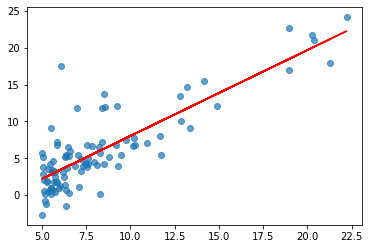

In [40]:
plt.scatter(x,y,alpha=0.7)
plt.plot(x,data['y_pred'],color='red')